In [ ]:
!pip install fastai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 90.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
from fastai.vision.all import *
import torch  # Fixes "NameError: name 'torch' is not defined"


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="bX6NkKUfcd0EV65RYTUW")
project = rf.workspace("fruit-onxba").project("rotten-fresh-fruitclassification")
version = project.version(5)
dataset = version.download("folder")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 54.3 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to rotten-fresh-fruitclassification-5 in folder:: 100%|██████████| 3714/3714 [00:01<00:00, 3542.73it/s]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

ValueError: Mountpoint must not already contain files

In [ ]:
dls = ImageDataLoaders.from_folder(dataset.location, valid='valid', bs=16, item_tfms=Resize(224))


In [ ]:
from torch.optim import AdamW  # ✅ Import optimizer

learn = vision_learner(dls, resnet34, metrics=[accuracy, Precision(), Recall(), F1Score()])
learn.opt_func = AdamW  # ✅ Set optimizer to AdamW


Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 151MB/s]


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
from fastai.metrics import Precision, Recall, F1Score

learn = vision_learner(
    dls,
    resnet34,
    metrics=[
        accuracy,
        Precision(average='macro'),
        Recall(average='macro'),
        F1Score(average='macro')
    ]
)

In [ ]:
learn.fit_one_cycle(50, lr_max=0.001, wd=0.0001)


epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,time
0,1.247349,0.503653,0.830935,0.804301,0.802750,0.800092,00:18
1,0.574351,0.175638,0.949640,0.944023,0.943688,0.943750,00:14
2,0.317909,0.119667,0.949640,0.944894,0.938190,0.940863,00:14
3,0.220427,0.101174,0.960432,0.956716,0.950532,0.952675,00:14
4,0.159685,0.109190,0.967626,0.964579,0.960096,0.961484,00:14
5,0.132520,0.076808,0.960432,0.953563,0.950315,0.950888,00:15
6,0.104601,0.086732,0.971223,0.968148,0.959284,0.962101,00:16
7,0.085965,0.077042,0.967626,0.967614,0.961951,0.964016,00:15
8,0.100708,0.123957,0.956835,0.958179,0.951803,0.953930,00:14
9,0.081247,0.044087,0.985611,0.982930,0.982192,0.982378,00:14


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
import pandas as pd

# Get predictions
preds, targs = learn.get_preds()

# Convert to numpy
y_pred = preds.argmax(dim=1).numpy()
y_true = targs.numpy()

# Calculate metrics
precision = precision_score(y_true, y_pred, average='macro')  # Or 'weighted'
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

# Create summary table
resnet_metrics_df = pd.DataFrame({
    'Model': ['ResNet-34'],
    'Images': [len(y_true)],
    'Instances': [sum([1 for _ in y_true])],
    'Precision': [round(precision, 3)],
    'Recall': [round(recall, 3)],
    'F1 Score': [round(f1, 3)]
})

from IPython.display import display
display(resnet_metrics_df)


,Model,Images,Instances,Precision,Recall,F1 Score
0,ResNet-34,278,278,0.98,0.98,0.98


In [ ]:
import os
os.makedirs('/content/drive/MyDrive/resnet_results', exist_ok=True)

# Export the entire learner (recommended)
learn.export('/content/drive/MyDrive/resnet_results/resnet34_model.pkl')

# Or, save just the weights
learn.save('/content/drive/MyDrive/resnet_results/resnet34_weights')


Path('/content/drive/MyDrive/resnet_results/resnet34_weights.pth')

In [ ]:
import pandas as pd

# Convert recorded training history to DataFrame
df = learn.recorder.values
cols = learn.recorder.metric_names[1:-1]  # remove train_loss/valid_loss duplication
results_df = pd.DataFrame(df, columns=cols)

# Save to Drive as CSV
results_df.to_csv('/content/drive/MyDrive/resnet_results/training_metrics.csv', index=False)


ValueError: 6 columns passed, passed data had 5 columns

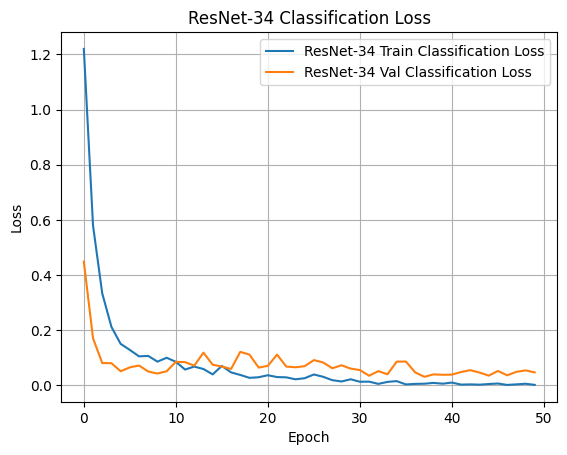

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import os

# 📁 Make directory
os.makedirs('/content/drive/MyDrive/ComparisonPlots', exist_ok=True)

# 📄 Load metrics from CSV
metrics_df = pd.read_csv('/content/drive/MyDrive/resnet_results/training_metrics.csv')

# 📊 Plot training and validation losses
plt.plot(metrics_df['train_loss'], label='ResNet-34 Train Classification Loss')
plt.plot(metrics_df['valid_loss'], label='ResNet-34 Val Classification Loss')

# 🏷️ Labels and Save

plt.title("ResNet-34 Classification Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.savefig('/content/drive/MyDrive/ComparisonPlots/resnet_loss_plot4.png')
plt.show()


In [ ]:
#dataset imported from Roboflow. You can sign up at roboflow.com and upload your image classification dataset
# from roboflow import Roboflow
# rf = Roboflow(api_key="YOUR_API_KEY")
# project = rf.workspace().project("YOUR_PROJECT")
# dataset = project.version("YOUR VERSION").download("folder")


In [ ]:
dataset.location

'/content/rotten-fresh-fruitclassification-3'

In [ ]:
from fastai.vision.all import *
#build fastai dataset loader
np.random.seed(42)
#fastai automatically factors the ./train and ./valid folders into seperate datasets
#more details https://docs.fast.ai/vision.data.html#ImageDataLoaders.from_folder
path = Path(dataset.location)
data = ImageDataLoaders.from_folder(
    path,
    item_tfms=Resize(224),
    batch_tfms=[*aug_transforms(), Normalize.from_stats(*imagenet_stats)],  # ✅ Fix applied here
    num_workers=4
)


In [ ]:
data.vocab  # ✅ Correct way to get class labels


['freshapples', 'freshbananas', 'freshoranges', 'rottenapples', 'rottenbananas', 'rottenoranges']

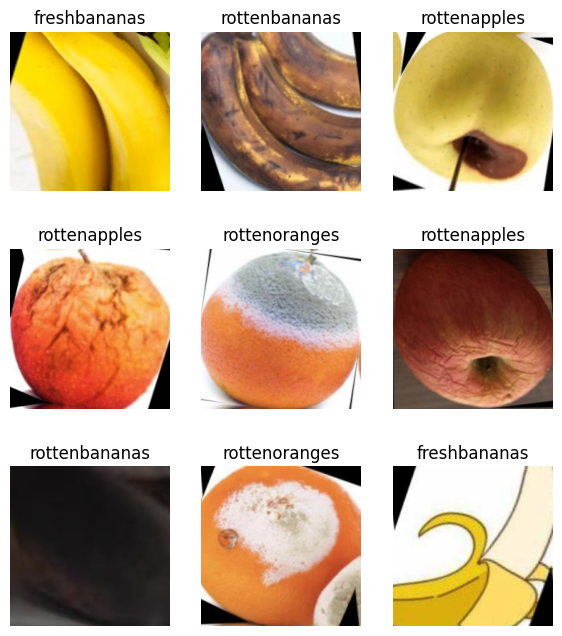

In [ ]:
data.show_batch(max_n=9, figsize=(7, 8))  # ✅ Uses `max_n` instead of `rows`


In [ ]:
# Load a ResNet-34 model
learn = cnn_learner(data, resnet34, metrics=accuracy)

# Train with early stopping and save the best model
cbs = [EarlyStoppingCallback(monitor='valid_loss', patience=3), SaveModelCallback()]
learn.fine_tune(10, cbs=cbs)  # Train for 5 epochs


`cnn_learner` has been renamed to `vision_learner` -- please update your code
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 78.4MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,0.833742,0.099781,0.978417,00:23


Better model found at epoch 0 with valid_loss value: 0.09978052973747253.


You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.


epoch,train_loss,valid_loss,accuracy,time
0,0.161678,0.055203,0.985611,00:21
1,0.098740,0.062836,0.982014,00:20
2,0.074441,0.071579,0.971223,00:20
3,0.060554,0.055689,0.985611,00:20


Better model found at epoch 0 with valid_loss value: 0.055202677845954895.
No improvement since epoch 0: early stopping


In [ ]:
learn.save('best_resnet34')  # Save model checkpoint
learn.load('best_resnet34')  # Load for continued training

In [ ]:
learn

TRain

In [ ]:
from fastai.callbacks import *
early_stop = EarlyStoppingCallback(learn, patience=20)
save_best_model = SaveModelCallback(learn, name='best_resnet34')

ModuleNotFoundError: No module named 'fastai.callbacks'

In [ ]:
#frozen training step
defaults.device = torch.device('cuda') # makes sure the gpu is used
learn.fit_one_cycle(1, callbacks=[early_stop, save_best_model])

NameError: name 'early_stop' is not defined

In [ ]:
def find_appropriate_lr(model:Learner, lr_diff:int = 15, loss_threshold:float = .05, adjust_value:float = 1, plot:bool = False) -> float:
    #Run the Learning Rate Finder
    model.lr_find()

    #Get loss values and their corresponding gradients, and get lr values
    losses = np.array(model.recorder.losses)
    min_loss_index = np.argmin(losses)


    #loss_grad = np.gradient(losses)
    lrs = model.recorder.lrs

    #return the learning rate that produces the minimum loss divide by 10
    return lrs[min_loss_index] / 10

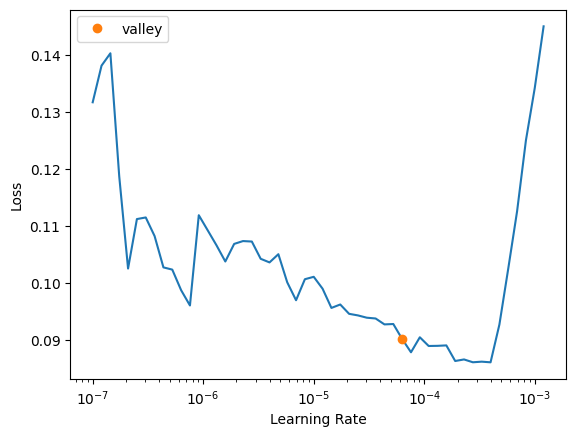

In [ ]:
optimal_lr = find_appropriate_lr(learn)

Evaluation

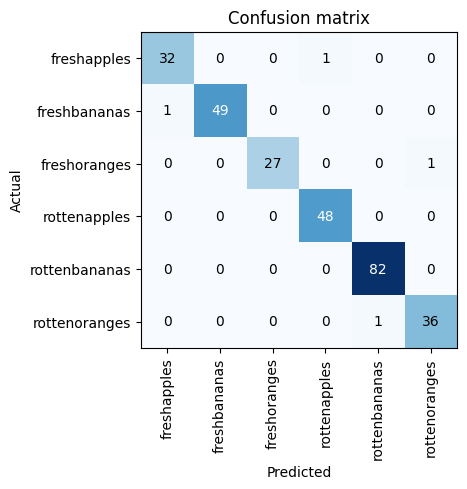

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()


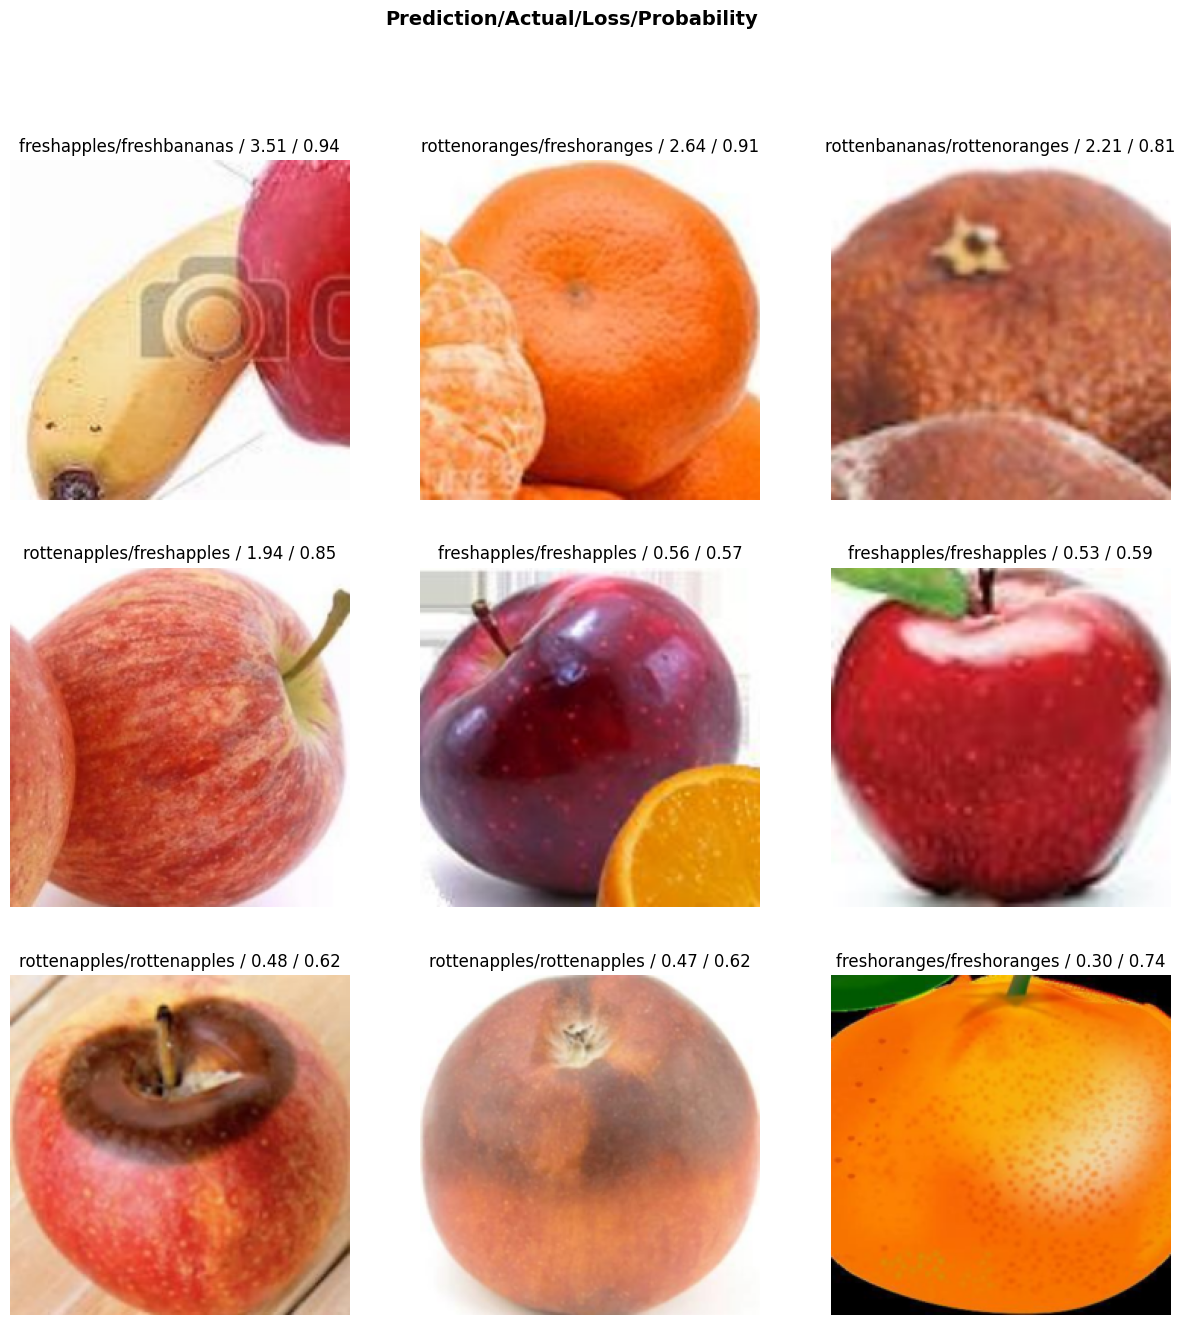

In [ ]:
interp.plot_top_losses(9, figsize=(15,15))


In [ ]:
#run inference on test images
import glob
from IPython.display import Image, display

model = learn.model
model = model.cuda()
for imageName in glob.glob('/content/test/*/*.jpg'):
    print(imageName)
    img = open_image(imageName)
    prediction = learn.predict(img)
    #print(prediction)
    print(prediction[0])
    display(Image(filename=imageName))
    print("\n")

In [ ]:
#model is automatically saved with the "save_best_model" callback
%ls models

ls: cannot access 'models': No such file or directory
